# Question 3.1.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.mixture as sm
import scipy as sc
from sklearn.preprocessing import StandardScaler, add_dummy_feature

## Part 2
### 500 samples  of the the bivariate Gaussian mixture model: 0.3N (µ1; Σ) + 0.7N (µ2; Σ)

In [3]:
def get_samples(number_of_samples,mean1,mean2,cov):
    samples=0.3*np.random.multivariate_normal(mean1,cov,number_of_samples)+0.7*np.random.multivariate_normal(mean2,cov,number_of_samples)
    return samples

samples=get_samples(500,[-3,0],[3,0],[[2,0.5],[0.5,1]])

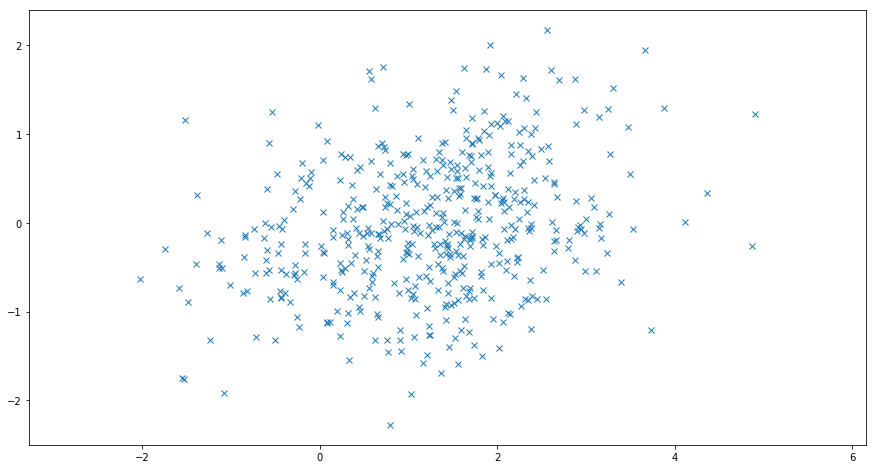

In [4]:
#figure of this 500 samples

plt.figure(figsize=(15,8))
plt.plot(samples.T[0], samples.T[1], 'x')
plt.axis('equal')
plt.show()

## Part 3
### Load and figure of the Unistroke data set

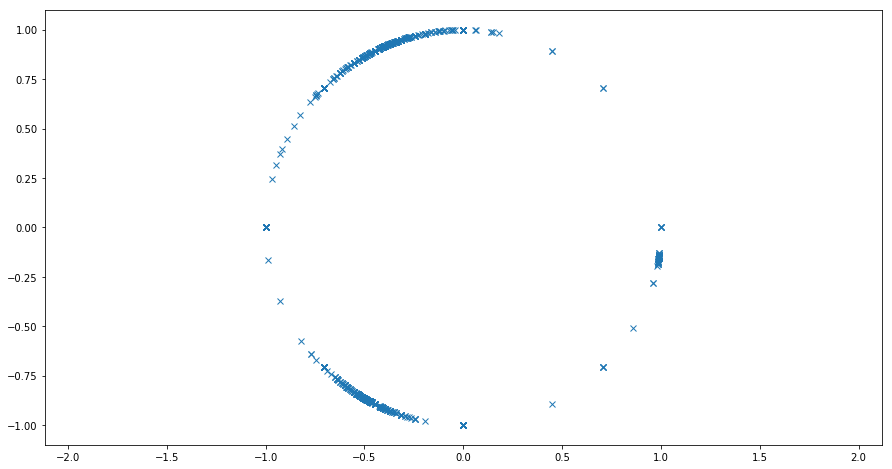

In [52]:
data=np.genfromtxt('Amerge.txt', delimiter=' ')
plt.figure(figsize=(15,8))
plt.plot(data.T[0], data.T[1], 'x')
plt.axis('equal')
plt.show()

# Question 3.1.2

## Part 1

### Parameters for k=2

In [94]:
model_2_Classes=sm.GaussianMixture(2)
model_2_Classes.fit(data)
means_2_Classes=model_2_Classes.means_
cov_2_Classes=model_2_Classes.covariances_
print("The means of class 1 = {} \nand of class 2 = {}".format(means_2_Classes[0],means_2_Classes[1]))
print("The covarience matrix of class 1 =\n {}\n and for class 2 =\n {}".format(cov_2_Classes[0],cov_2_Classes[1]))

The means of class 1 = [-0.26844473 -0.78097429] 
and of class 2 = [-0.38784167  0.86500762]
The covarience matrix of class 1 =
 [[0.25689823 0.10519069]
 [0.10519069 0.06112036]]
 and for class 2 =
 [[0.06297394 0.03631771]
 [0.03631771 0.03836871]]


### Parameters for k=3

In [77]:
model_3_Classes=sm.GaussianMixture(3)
model_3_Classes.fit(data)
means_3_Classes=model_3_Classes.means_
cov_3_Classes=model_3_Classes.covariances_
print("The means of class 1 = {} \nand of class 2 = {} \nand of class 3 = {}".format(means_3_Classes[0],means_3_Classes[1],means_3_Classes[2]))
print("The covarience matrix of class 1 =\n {}\n and for class 2 =\n {} \n and for class 2 =\n {}".format(cov_3_Classes[0],cov_3_Classes[1],cov_3_Classes[2]))

The means of class 1 = [-0.48466513 -0.8312209 ] 
and of class 2 = [-0.367334    0.90125823] 
and of class 3 = [ 0.94979391 -0.17268733]
The covarience matrix of class 1 =
 [[ 0.03438828 -0.02971976]
 [-0.02971976  0.03978524]]
 and for class 2 =
 [[0.0443732  0.01649393]
 [0.01649393 0.00842814]] 
 and for class 2 =
 [[0.0112068  0.00899436]
 [0.00899436 0.05686582]]


## Part 2

### Figure for the 2 classes

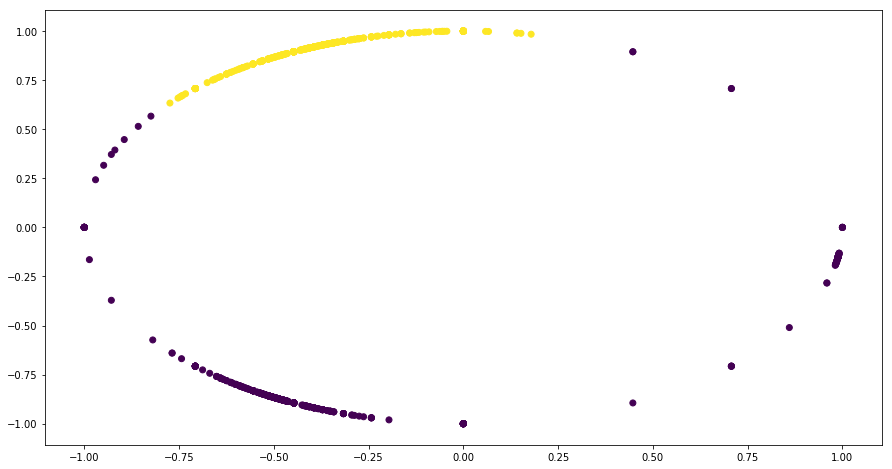

In [88]:

result_2_Classes=model_2_Classes.predict(data)
plt.figure(figsize=(15,8))
plt.scatter(data.T[0],data.T[1],c=result_2_Classes)

### Figure for the 3 classes

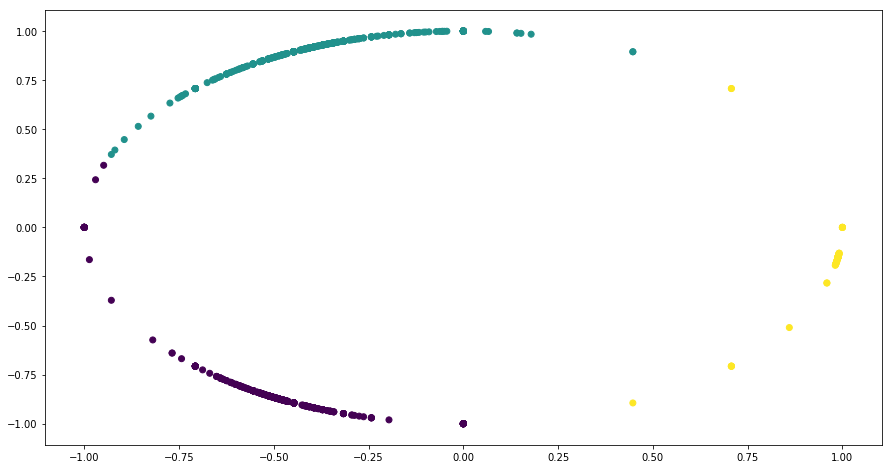

In [79]:
result_3_Classes=model_3_Classes.predict(data)
plt.figure(figsize=(15,8))
plt.scatter(data.T[0],data.T[1],c=result_3_Classes)

## Part 3

### Plotting the first column of the data without labels with the distribution over this column

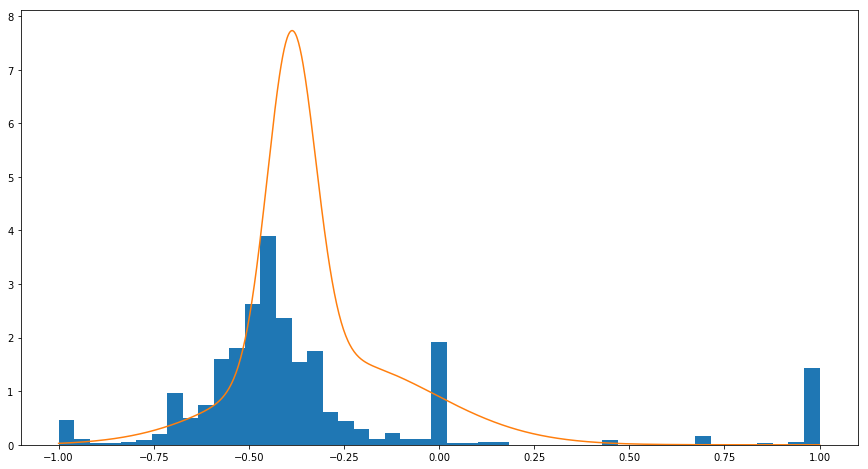

In [80]:
r=np.linspace(-1.0,1.0,1000)
plt.figure(figsize=(15,8))
plt.hist(data.T[0], bins='auto',density=True)
rands1=sc.stats.norm.pdf(r,means_2_Classes[0,0],cov_2_Classes[0,0,0])
rands2=sc.stats.norm.pdf(r,means_2_Classes[1,0],cov_2_Classes[1,0,0])
plt.plot(r,rands2+rands1)
plt.show()

### Plotting the first column of the data with labels with the distribution over this column

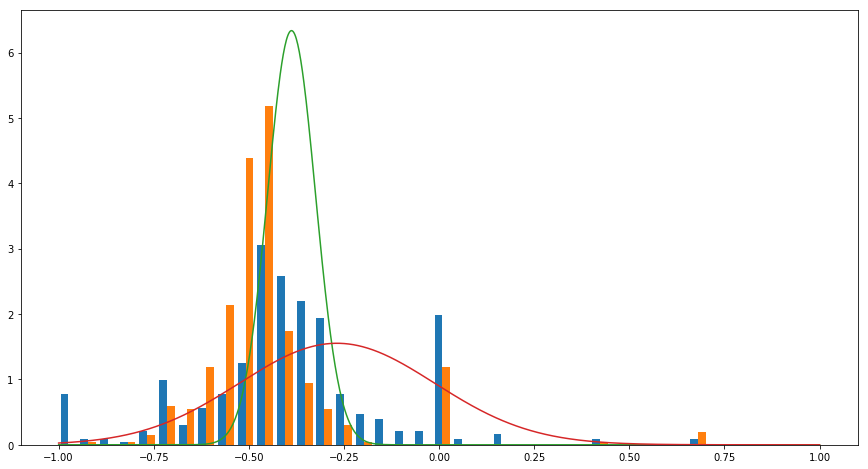

In [81]:
r=np.linspace(-1.0,1.0,1000)
plt.figure(figsize=(15,8))
plt.hist([data.T[0][result_2_Classes==0],data.T[0][result_2_Classes==1]], bins='auto',density=True)
rands1=sc.stats.norm.pdf(r,means_2_Classes[0,0],cov_2_Classes[0,0,0])
plt.plot(r,rands1)
rands2=sc.stats.norm.pdf(r,means_2_Classes[1,0],cov_2_Classes[1,0,0])
plt.plot(r,rands2)
plt.show()

### Plotting the second column of the data without labels with the distribution over this column

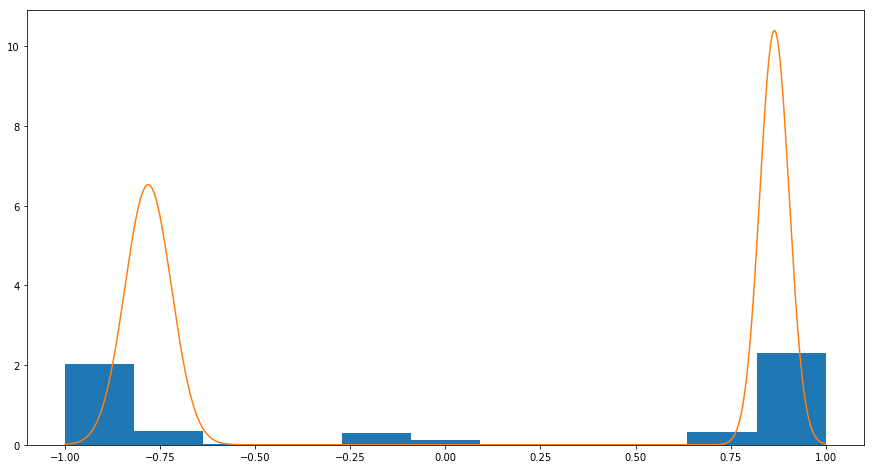

In [82]:
r=np.linspace(-1.0,1.0,1000)
plt.figure(figsize=(15,8))
plt.hist(data.T[1], bins='auto',density=True)
rands1=sc.stats.norm.pdf(r,means_2_Classes[0,1],cov_2_Classes[0,1,1])
rands2=sc.stats.norm.pdf(r,means_2_Classes[1,1],cov_2_Classes[1,1,1])
plt.plot(r,rands1+rands2)
plt.show()

### Plotting the second column of the data with labels with the distribution over this column

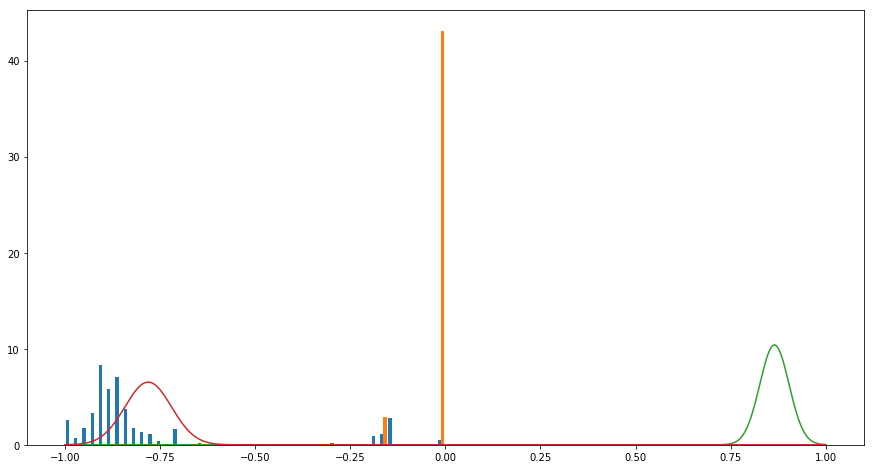

In [83]:
r=np.linspace(-1.0,1.0,1000)
plt.figure(figsize=(15,8))
plt.hist([data.T[1][result_2_Classes==1],data.T[1][result_2_Classes==0]], bins='auto',density=True)
rands1=sc.stats.norm.pdf(r,means_2_Classes[0,1],cov_2_Classes[0,1,1])
plt.plot(r,rands1)
rands2=sc.stats.norm.pdf(r,means_2_Classes[1,1],cov_2_Classes[1,1,1])
plt.plot(r,rands2)
plt.show()

### Color map

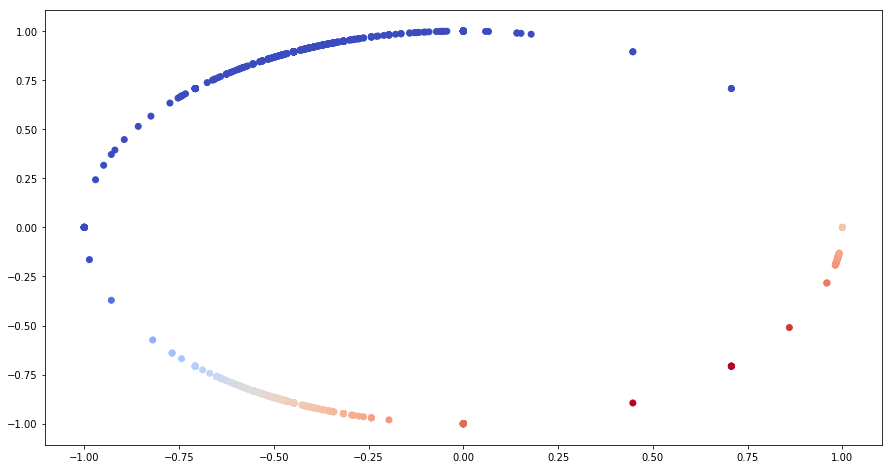

In [95]:
plt.figure(figsize=(15,8))
proba_of_class_1=model_2_Classes.predict_proba(data)[:,1]
plt.scatter(x=data.T[0], y=data.T[1], c=-np.log(proba_of_class_1), cmap='coolwarm')

# Question 3.2

## Part 1

### Transforming to angular data

In [15]:
def f(x):
    return np.arctan2(x[:,1],x[:,0])
angular_data=f(np.array(data))

### Plotting of the histogram

(array([0.01832412, 0.        , 0.        , 0.01832412, 0.        ,
        0.        , 0.        , 0.01832412, 0.03664824, 0.01832412,
        0.25653765, 0.25653765, 0.47642706, 0.95285412, 1.7591153 ,
        1.64917059, 0.67799236, 0.27486177, 0.16491706, 0.01832412,
        0.        , 0.        , 0.43977882, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01832412, 0.        , 0.        , 0.        , 0.        ,
        0.07329647, 0.        , 0.        , 0.        , 0.01832412,
        0.        , 0.        , 0.        , 0.03664824, 0.        ,
        0.21988941, 0.64134412, 0.        , 0.09162059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03664824, 0.        , 0.        , 0.        ,
        0.        , 0.03664824, 0.        , 0.        , 0.        ,
        0.        , 0.03664824, 0.03664824, 0.03

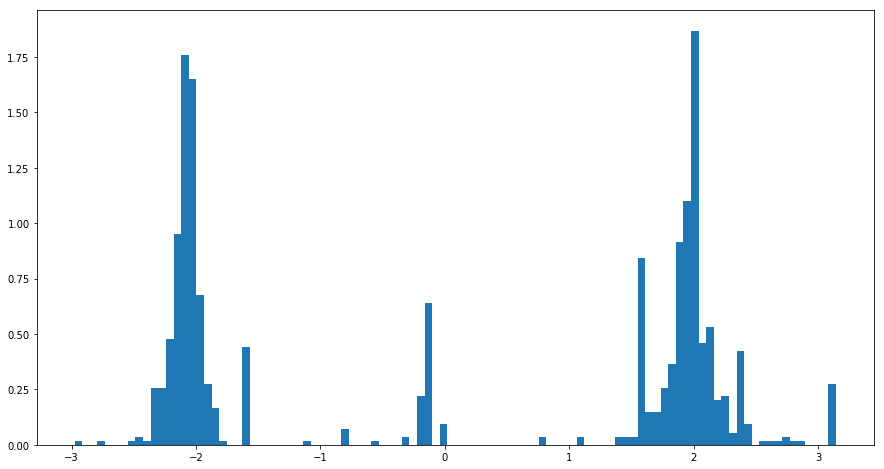

In [16]:
plt.figure(figsize=(15,8))
plt.hist(angular_data,bins=100,density=True)

### Finding a library and applying the Von Mises Mixture model

In [28]:
from spherecluster import VonMisesFisherMixture

vmf = VonMisesFisherMixture(n_clusters=2, posterior_type='soft')
vmf.fit(data)
result=vmf.predict(data)

### Plotting the result with labels

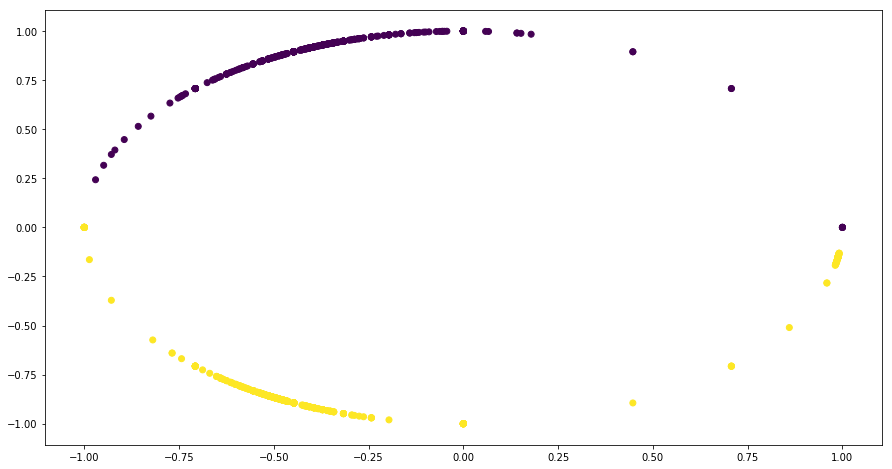

In [29]:
plt.figure(figsize=(15,8))
plt.scatter(data.T[0],data.T[1],c=result)

### Plotting the histogram of the 2 classes with the distribution of each one

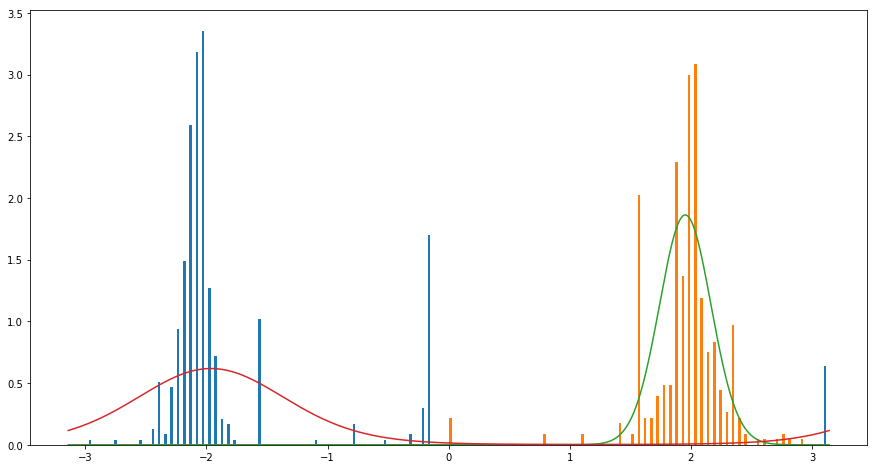

In [30]:
from scipy.stats import vonmises

centers = np.arctan2(vmf.cluster_centers_[:,1],vmf.cluster_centers_[:,0])
plt.figure(figsize=(15,8))
plt.hist([angular_data[result==1],angular_data[result==0]], bins='auto',density=True)
kappa=vmf.concentrations_[0]
x = np.linspace(-np.pi,np.pi, 1000)
plt.plot(x, vonmises.pdf(x, kappa, loc = centers[0]))
kappa=vmf.concentrations_[1]
plt.plot(x, vonmises.pdf(x, kappa, loc = centers[1]))

### Plotting with colourmap

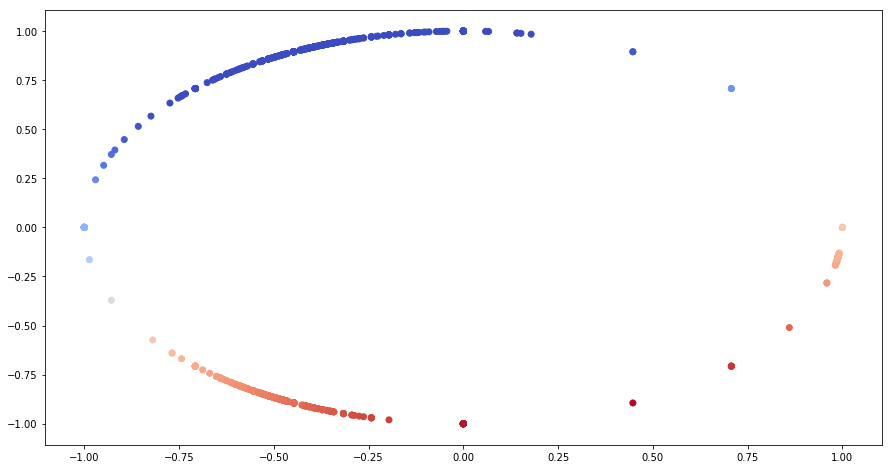

In [85]:
plt.figure(figsize=(15,8))
posterios = vmf.posterior_.T[:, 0]
plt.scatter(x=data.T[0], y=data.T[1], c=-np.log(posterios), cmap='coolwarm')